# <font color='dark'>**Seleção e agrupamento de dados com pandas**</font>

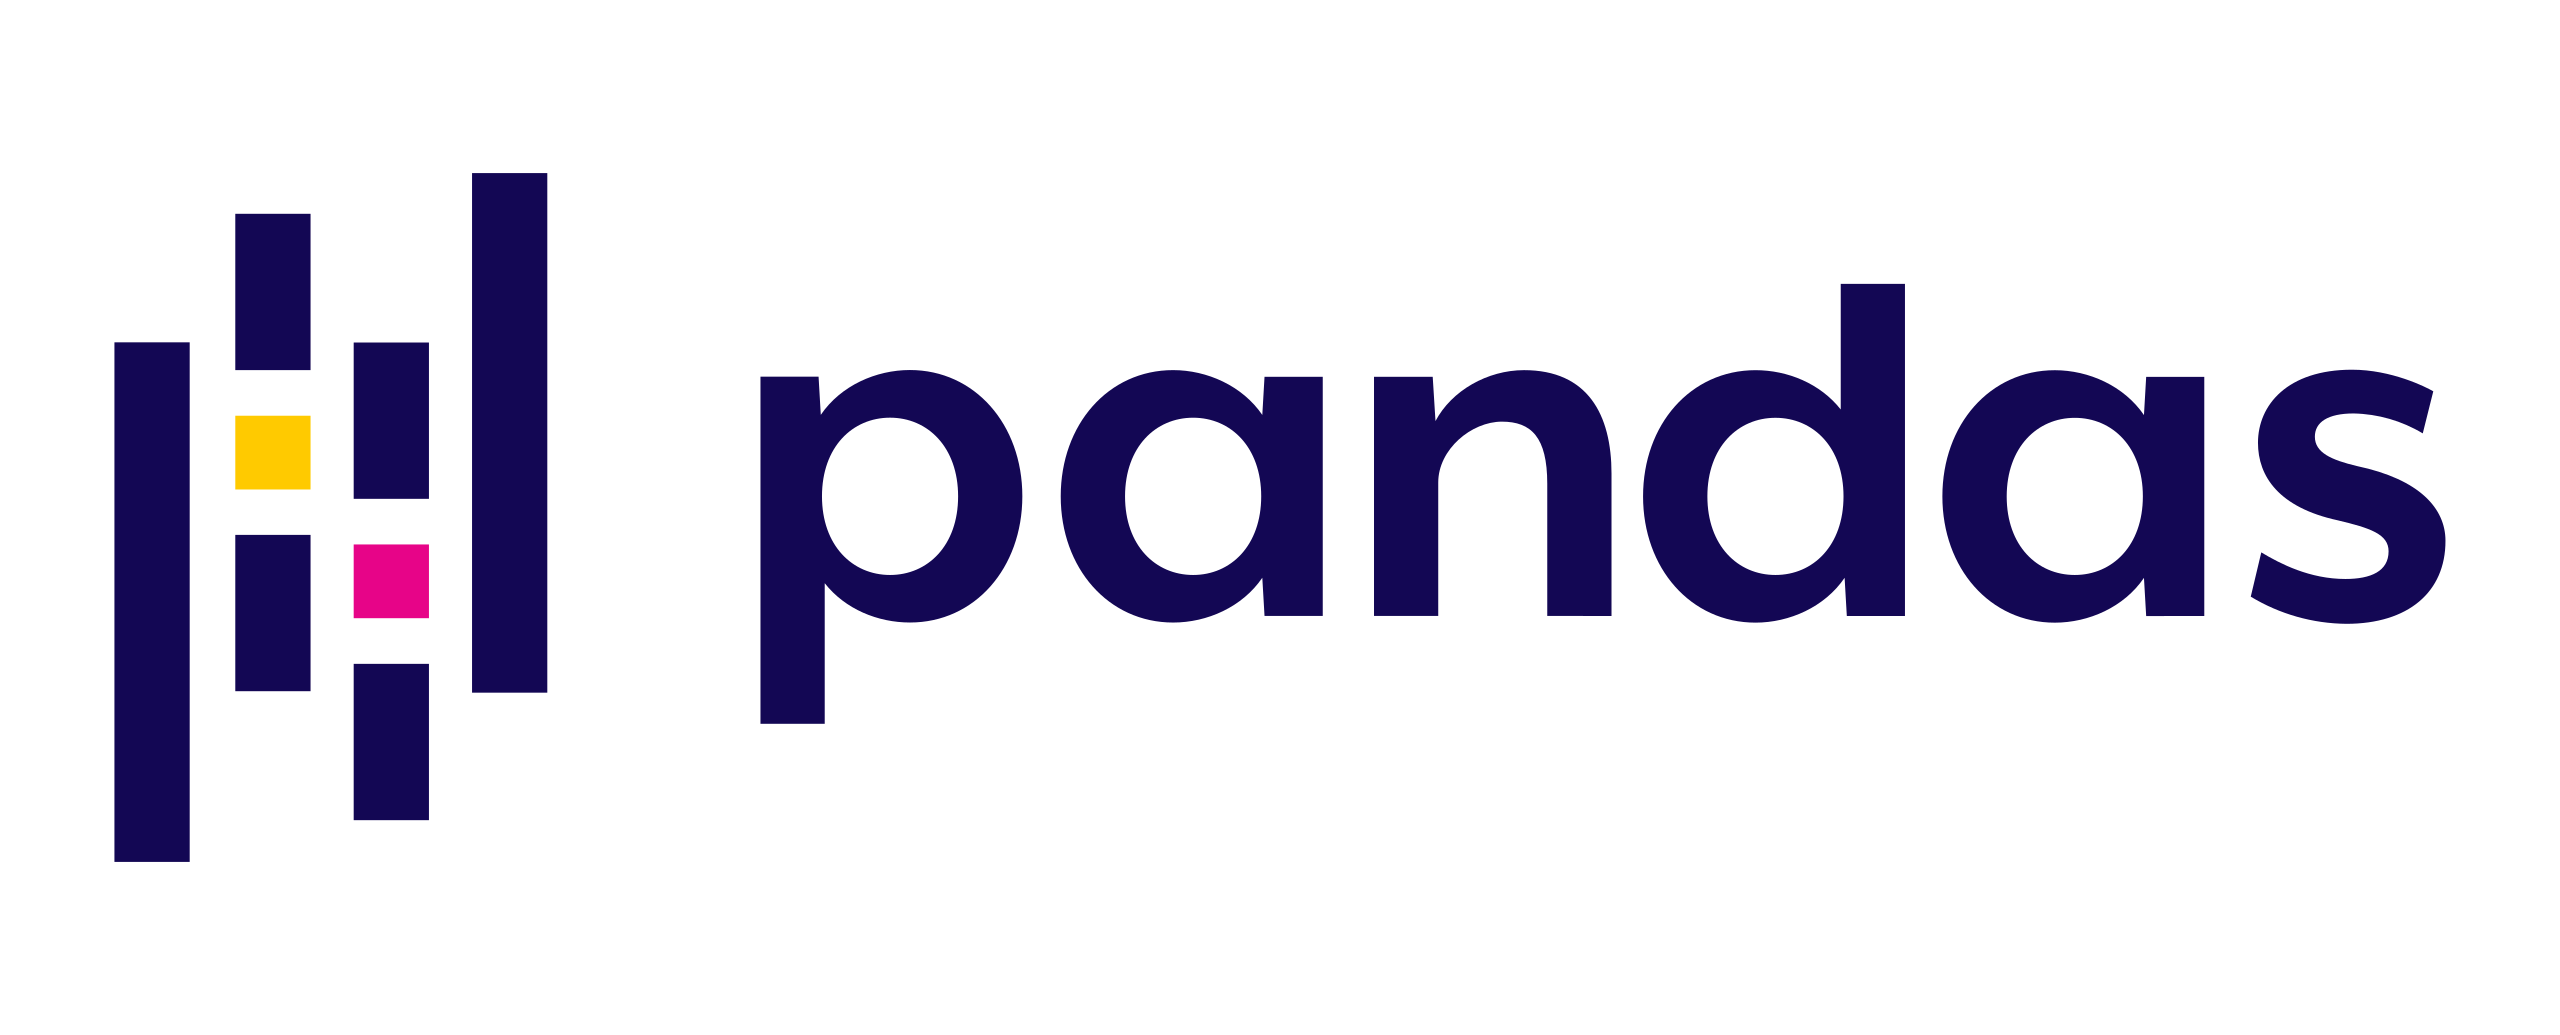

### Fazendo a leitura dos dados

Vamos analisar dados de emissões de gases de efeito estufa no território brasileiro e criar tabelas e visualizações para entender os dados e gerar insights a partir deles. Os dados foram extraídos do SEEG.

---
ℹ Fonte: SEEG - Sistema de Estimativa de Emissões e Remoções de Gases de Efeito Estufa, Observatório do Clima, acessado em http://seeg.eco.br:

- [Download da base de dados](http://seeg.eco.br/download)
---

Primeiramente, vamos importar a biblioteca [`pandas`](https://pandas.pydata.org/docs/index.html) e os dados que serão utilizados. Como os dados estão em um arquivo excel, vamos usar a função [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

In [1]:
import pandas as pd
url = 'https://github.com/rgrAndrade/Analise_de_Gases_de_Efeito_Estufa/blob/main/Dados/1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx?raw=True'
df = pd.read_excel(url)
df.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,Base de Dados de Estimativa de Emissões de Gas...
2,NaN,NaN,NaN,NaN,NaN,SEEG 10
3,NaN,NaN,NaN,NaN,NaN,Novembro 2022
4,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
emissoes_gases = pd.read_excel(url, sheet_name='GEE Estados')
emissoes_gases.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


Vamos checar a estrutura do nosso DataFrame com o uso do método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info), que retorna a quantidade de linhas e colunas, bem como a informação de quantidade de dados nulos e tipos de dados para cada uma das colunas.

In [3]:
emissoes_gases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103312 entries, 0 to 103311
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Nível 1 - Setor             103312 non-null  object 
 1   Nível 2                     103312 non-null  object 
 2   Nível 3                     103253 non-null  object 
 3   Nível 4                     90920 non-null   object 
 4   Nível 5                     100788 non-null  object 
 5   Nível 6                     97691 non-null   object 
 6   Emissão / Remoção / Bunker  103312 non-null  object 
 7   Gás                         103312 non-null  object 
 8   Estado                      97374 non-null   object 
 9   Atividade Econômica         102076 non-null  object 
 10  Produto                     37413 non-null   object 
 11  1970                        103312 non-null  float64
 12  1971                        103312 non-null  float64
 13  1972          

### Ajustando a base de dados

Estamos interessados somente na emissão de gases gerados pelos estados que estejam no inventário nacional, portanto vamos identificar os tipos de dados únicos da coluna *Emissão / Remoção / Bunker*.

---
ℹ
- *Remoções são dados referentes à retirada dos gases estufa, que é o contrário da emissão*
- *NCI são dados não contemplados no inventário nacional*
- *Bunkers são emissões de transporte marítimo e aéreo internacional, portanto não são emissões diretas dos estados.*

*Informação disponível no site do SEEG: https://seeg.eco.br/entenda-as-estimativas*

---

In [4]:
emissoes_gases['Emissão / Remoção / Bunker'].unique()

array(['Emissão', 'Emissão NCI', 'Remoção NCI', 'Bunker', 'Remoção'],
      dtype=object)

Vamos checar primeiro os dados de remoção, para identificar se todos eles são de retirada de gases estufa.

In [5]:
(emissoes_gases['Emissão / Remoção / Bunker'] == 'Remoção NCI') | (emissoes_gases['Emissão / Remoção / Bunker'] == 'Remoção')

,Emissão / Remoção / Bunker
0,False
1,False
2,False
3,False
4,False
...,...
103307,False
103308,False
103309,False
103310,False


In [6]:
emissoes_gases[emissoes_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção'])]

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RO,PEC,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AC,PEC,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AM,PEC,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RR,PEC,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),PA,PEC,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR4,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR6,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


In [7]:
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção']), 1970:2021]

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


Para identificar se todos os valores são negativos, vamos utilizar a função `max()` para checar se tem algum valor maior do que 0.

In [8]:
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção']), 1970:2021].max()

,0
1970,0.0
1971,0.0
1972,0.0
1973,0.0
1974,0.0
1975,0.0
1976,0.0
1977,0.0
1978,0.0
1979,0.0


Vamos também identificar se algum valor do tipo *Bunker* corresponde a alguma emissão feita por algum estado.

In [9]:
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker'] == 'Bunkers', 'Estado'].unique()

array([], dtype=object)

In [10]:
emissao_gases = emissoes_gases[emissoes_gases['Emissão / Remoção / Bunker'] == 'Emissão']
emissao_gases

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000,40300.000,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR5,MS,AGROPEC,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000,871393.000,1004191.000
103242,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MT,AGROPEC,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000,368149.000,443120.000
103243,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MS,AGROPEC,...,439524.000000,502908.000000,442493.000000,367116.000000,440798.000000,393101.000000,413749.000000,439526.000,876637.000,1009968.000
103244,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,N2O (t),MT,AGROPEC,...,108.441090,109.811199,166.680103,141.442361,201.556097,162.932751,137.219684,158.000,314.000,479.000


Como não restou nenhum valor útil para análise na coluna de *Emissão / Remoção / Bunker*, vamos removê-la por completo da base de dados.

In [11]:
emissao_gases = emissao_gases.drop(columns='Emissão / Remoção / Bunker')
emissao_gases

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,...,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,...,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,...,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000,40300.000,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000,871393.000,1004191.000
103242,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000,368149.000,443120.000
103243,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,...,439524.000000,502908.000000,442493.000000,367116.000000,440798.000000,393101.000000,413749.000000,439526.000,876637.000,1009968.000
103244,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,...,108.441090,109.811199,166.680103,141.442361,201.556097,162.932751,137.219684,158.000,314.000,479.000


### Modificando o formato do DataFrame


Para realizar as agregações nos dados de emissão, é necessário que a base de dados esteja em um formato adequado, com os valores de emissão todos em uma mesma coluna. Para isso, devemos modificar o formato da base de dados de forma que as colunas referentes a cada ano se tornem uma só coluna.

In [13]:
emissao_gases.loc[:, 'Nível 1 - Setor':'Produto'].columns

Index(['Nível 1 - Setor', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5',
       'Nível 6', 'Gás', 'Estado', 'Atividade Econômica', 'Produto'],
      dtype='object')

In [14]:
colunas_info = list(emissao_gases.loc[:, 'Nível 1 - Setor':'Produto'].columns)
colunas_info

['Nível 1 - Setor',
 'Nível 2',
 'Nível 3',
 'Nível 4',
 'Nível 5',
 'Nível 6',
 'Gás',
 'Estado',
 'Atividade Econômica',
 'Produto']

In [15]:
emissoes_gases.loc[:, 1970:2021].columns

Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021],
      dtype='object')

In [16]:
colunas_emissao = list(emissoes_gases.loc[:, 1970:2021].columns)
colunas_emissao

[1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

Para realizar a transformação do DataFrame, utilizamos o método [`melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html). Esse método tem o intuito de transformar um DataFrame de um formato amplo (*wide*) para o formato longo (*long*).

In [17]:
emissoes_gases.melt(id_vars = colunas_info, value_vars = colunas_emissao, var_name = 'Ano' , value_name = 'Emissão')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5372219,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,CO2e (t) GTP-AR6,BR,NaN,NaN,2021,0.0
5372220,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,CO2e (t) GWP-AR2,BR,NaN,NaN,2021,0.0
5372221,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,CO2e (t) GWP-AR4,BR,NaN,NaN,2021,0.0
5372222,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,CO2e (t) GWP-AR5,BR,NaN,NaN,2021,0.0


In [18]:
emissoes_por_ano = emissoes_gases.melt(id_vars = colunas_info, value_vars = colunas_emissao, var_name = 'Ano' , value_name = 'Emissão')

### Análise dos gases

Vamos fazer uma análise agora da quantidade de emissão **total** por tipo de gás. Para isso, vamos realizar um agrupamento dos dados com a função [`groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).


In [19]:
emissoes_por_ano.groupby('Gás')

Podemos checar quais dados foram agrupados em cada grupo com uso do atributo [`groups`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.groups.html) e realizar seleções de grupos específicos com o método [`get_group()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.get_group.html).

In [20]:
emissoes_por_ano.groupby('Gás').groups

{'C2F6 (t)': [410, 411, 412, 425, 426, 427, 103722, 103723, 103724, 103737, 103738, 103739, 207034, 207035, 207036, 207049, 207050, 207051, 310346, 310347, 310348, 310361, 310362, 310363, 413658, 413659, 413660, 413673, 413674, 413675, 516970, 516971, 516972, 516985, 516986, 516987, 620282, 620283, 620284, 620297, 620298, 620299, 723594, 723595, 723596, 723609, 723610, 723611, 826906, 826907, 826908, 826921, 826922, 826923, 930218, 930219, 930220, 930233, 930234, 930235, 1033530, 1033531, 1033532, 1033545, 1033546, 1033547, 1136842, 1136843, 1136844, 1136857, 1136858, 1136859, 1240154, 1240155, 1240156, 1240169, 1240170, 1240171, 1343466, 1343467, 1343468, 1343481, 1343482, 1343483, 1446778, 1446779, 1446780, 1446793, 1446794, 1446795, 1550090, 1550091, 1550092, 1550105, 1550106, 1550107, 1653402, 1653403, 1653404, 1653417, ...], 'CF4 (t)': [407, 408, 409, 422, 423, 424, 103719, 103720, 103721, 103734, 103735, 103736, 207031, 207032, 207033, 207046, 207047, 207048, 310343, 310344, 3103

In [21]:
emissoes_por_ano.groupby('Gás').get_group('CO2 (t)')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
18,Processos Industriais,Indústria Química,Produção de Acrilonitrila,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,0.000000
23,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),RJ,OUTRA_IND,NaN,1970,0.000000
26,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),MG,OUTRA_IND,NaN,1970,0.000000
29,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,10742.465792
32,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),SE,OUTRA_IND,NaN,1970,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
5372170,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Caatinga,NaN,NaN,NaN,CO2 (t),BR,NaN,NaN,2021,0.000000
5372181,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Cerrado,NaN,NaN,NaN,CO2 (t),BR,NaN,NaN,2021,0.000000
5372192,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Mata Atlântica,NaN,NaN,NaN,CO2 (t),BR,NaN,NaN,2021,0.000000
5372203,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pampa,NaN,NaN,NaN,CO2 (t),BR,NaN,NaN,2021,0.000000


Os métodos de agregação possíveis com a utilização do `groupby()`são os seguintes:
- `count()` para realizar contagem
- `sum()` para soma
- `mean()` para a média
- `median()` para a mediana
- `min()` para o valor mínimo
- `max()` para o valor máximo
- `std()` para o desvio-padrão
- `var()` para a variância

In [22]:
emissoes_por_ano.groupby('Gás')[['Emissão']].sum()

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),8.031840e+08
CO (t),5.118477e+08
CO2 (t),4.153325e+10
CO2e (t) GTP-AR2,5.193173e+10
CO2e (t) GTP-AR4,5.193173e+10
CO2e (t) GTP-AR5,5.027836e+10
CO2e (t) GTP-AR6,5.094025e+10


In [24]:
emissao_por_gas = emissoes_por_ano.groupby('Gás')[['Emissão']].sum()
emissao_por_gas

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),8.031840e+08
CO (t),5.118477e+08
CO2 (t),4.153325e+10
CO2e (t) GTP-AR2,5.193173e+10
CO2e (t) GTP-AR4,5.193173e+10
CO2e (t) GTP-AR5,5.027836e+10
CO2e (t) GTP-AR6,5.094025e+10


In [25]:
emissao_por_gas = emissoes_por_ano.groupby('Gás')[['Emissão']].sum().sort_values('Emissão', ascending = False)
emissao_por_gas

,Emissão
Gás,
CO2e (t) GWP-AR5,7.048576e+10
CO2e (t) GWP-AR6,6.999228e+10
CO2e (t) GWP-AR4,6.882629e+10
CO2e (t) GWP-AR2,6.584700e+10
CO2e (t) GTP-AR2,5.193173e+10
CO2e (t) GTP-AR4,5.193173e+10
CO2e (t) GTP-AR6,5.094025e+10
CO2e (t) GTP-AR5,5.027836e+10
CO2 (t),4.153325e+10


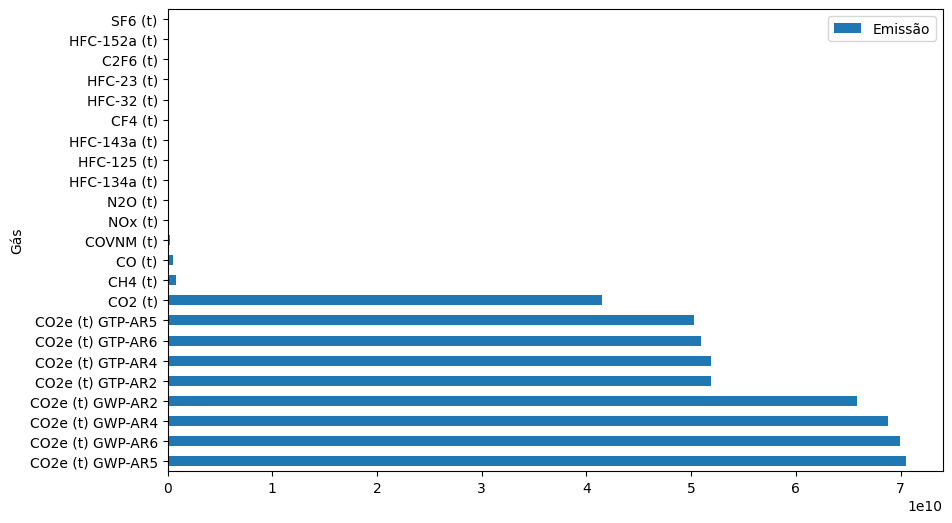

In [26]:
emissao_por_gas.plot(kind = 'barh', figsize = (10,6));

In [27]:
emissao_por_gas.iloc[0:9]

,Emissão
Gás,
CO2e (t) GWP-AR5,7.048576e+10
CO2e (t) GWP-AR6,6.999228e+10
CO2e (t) GWP-AR4,6.882629e+10
CO2e (t) GWP-AR2,6.584700e+10
CO2e (t) GTP-AR2,5.193173e+10
CO2e (t) GTP-AR4,5.193173e+10
CO2e (t) GTP-AR6,5.094025e+10
CO2e (t) GTP-AR5,5.027836e+10
CO2 (t),4.153325e+10


In [29]:
print(f'A emissão de CO2 corresponde a {float((emissao_por_gas.iloc[0:9].sum()/emissao_por_gas.sum()).iloc[0])*100:.2f} % de emissão total de gases de efeito estufa no Brasil de 1970 a 2021.')

A emissão de CO2 corresponde a 99.68 % de emissão total de gases de efeito estufa no Brasil de 1970 a 2021.


### Emissão de gases por setor

Agora vamos em busca de duas informações:

- Descobrir quais são os setores mais poluentes para cada gás;
- Descobrir quais são os gases mais poluentes para cada setor.

Para descobrir o setor que emite a maior quantidade de CO2, podemos realizar uma seleção específica do gás CO2 com o uso do método *cross-section* [`xs()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.xs.html), extraindo a partir disso o valor máximo e índice máximo com os métodos [`max()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html) e [`idxmax()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html?highlight=idxmax#pandas.DataFrame.idxmax).

Para evitar uma forma manual para cada tipo de gás, podemos explorar ainda mais o método `groupby()` em conjunto com o [`idxmax()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.idxmax.html?highlight=idxmax#pandas.core.groupby.DataFrameGroupBy.idxmax).

Por fim, podemos criar uma tabela sumarizada com as informações dos valores máximos de emissão para cada tipo de gás e com a referência do setor com maior emissão de cada gás.

Podemos alterar a ordem dos níveis de índice para encontrar a outra informação, que nos diz qual o gás mais emitido para cada tipo de setor. Para isso, vamos utilizar o método [`swaplevel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.swaplevel.html).

### Emissão ao longo dos anos

Vamos identificar se as emissões de gases estufas aumentaram ou diminuíram ao longo dos anos e visualizar essa variação para cada tipo de gás emitido separadamente.

### População dos estados

Vamos realizar a importação de uma nova base de dados com a informação da população de cada estado do Brasil, para posteriormente encontrarmos a emissão per capita de cada estado.

ℹ
Os dados foram obtidos através do [censo do IBGE](https://www.ibge.gov.br/estatisticas/sociais/saude/22827-censo-demografico-2022.html?=&t=resultados)

Como as informações são referentes aos municípios, vamos realizar uma agregação com base na coluna estado.

Percebemos que a informação da população não foi agregada, portanto será necessário algum tratamento nessa coluna para retornar devidamente os dados.

### Unindo os dados

Com as informações tratadas, podemos realizar a junção dos dados de emissão com a população, com uso do método [`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

Vamos verificar se há algum indício de se a emissão aumenta conforme o tamanho da população.

Se quisermos saber a informação de cada estado nos pontos do gráfico, podemos utilizar uma outra biblioteca para obter um gráfico mais elaborado.

Para obtermos a emissão per capita, criaremos uma nova coluna com a divisão dos valores de emissão pela população de cada estado.